# Observing rate of change

$ Price ROC = ((B - A) / A) * 100 $

$B = Current Price$
$A = Previous Price$


In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Let us load in our data

In [3]:
data1 = pd.read_csv('HY_ROC.csv') 
data1.head()

,Date,ROC OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
0,1997-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-02-28 00:00:00,-10.197368,135.777126,189.613309,-37.307297,-44.993862,-13.974684,-17.656402,-29.491463,-36.637931,-9.644284,-4.114195,37.430168,-10.018933,-9.359462,-35.061659
2,1997-03-31 00:00:00,4.029304,-121.393035,-120.711070,-14.508197,-15.809051,-22.513243,-24.401578,-23.716768,-33.875882,-18.505263,-25.753905,24.390244,13.004851,-35.301710,-246.396202
3,1997-04-30 00:00:00,3.521127,-87.209302,-19.452774,92.138063,92.032401,30.725408,34.272791,14.251208,13.948498,29.604753,37.490876,83.415033,-45.236371,-72.418953,185.627948
4,1997-05-31 00:00:00,-8.843537,-3352.272727,-640.111680,8.682635,13.083825,-25.072632,-31.346636,6.614316,29.084967,3.229021,3.806639,73.674833,-163.213071,46.654611,-12.958662


In [4]:
df = data1[1:] # drops the first column due to natural NAN from ROC adjustment
df.describe()

,ROC OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,278.000000,278.000000,278.000000,277.000000,277.000000,274.000000,274.000000,271.000000,271.000000,268.000000,268.000000,256.000000,256.000000,244.000000,244.000000
mean,0.894837,-225.311353,-243.046699,-47.710024,25.045844,18.318499,-33.095791,41.246843,194.274510,2.476463,7.309121,-1.025451,-27.248113,-5.609003,0.126422
std,10.746053,1689.031644,1757.620209,1058.557358,1447.162772,1418.743923,1071.885309,714.078628,2930.934842,169.769451,243.441201,261.652664,557.174647,1645.441150,171.627924
min,-18.011257,-26222.222220,-25214.049590,-6980.000000,-10998.863640,-13007.142860,-14535.068490,-2157.342657,-1351.082937,-1187.905605,-1270.082102,-2913.669065,-8722.894737,-20633.333330,-900.899183
25%,-5.548331,-190.379441,-187.469453,-77.271169,-71.406103,-49.282276,-47.119011,-32.151371,-34.466486,-26.069289,-27.057227,-18.528422,-18.436683,-15.121247,-16.409407
50%,0.000000,-81.259440,-80.861766,-14.923790,-13.184479,-10.199241,-11.272102,-0.509857,-2.565318,-4.277059,-3.908415,0.000000,0.000000,-0.266340,-1.238801
75%,5.064642,2.336334,12.930389,39.220523,48.653576,25.804645,29.028156,24.010722,25.875306,20.795441,17.397445,19.957760,21.015046,11.405355,12.294289
max,73.320158,2720.634921,4462.367223,12964.285710,18245.312500,18746.341460,8632.577904,10891.666670,47945.714290,801.857226,2157.493649,2105.245902,804.490741,14375.000000,1815.244801


In [5]:
df1 = df.drop(columns=['Date']) # drops date column for min _ max normalization 
df1.head()

#min max normalization
column_maxes = df1.max()
df_max = column_maxes.max()
column_mins = df1.min()
df_min = column_mins.min()
normalized_df = (df1 - column_mins) / (column_maxes - column_mins)
normalized_df.describe()

,ROC OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,278.000000,278.000000,278.000000,277.000000,277.000000,274.000000,274.000000,271.000000,271.000000,268.000000,268.000000,256.000000,256.000000,244.000000,244.000000
mean,0.207005,0.898215,0.841443,0.347583,0.376961,0.410206,0.625958,0.168487,0.031348,0.598253,0.372681,0.580333,0.912700,0.589223,0.331730
std,0.117660,0.058357,0.059226,0.053076,0.049486,0.044680,0.046266,0.054723,0.059455,0.085321,0.071024,0.052133,0.058481,0.047001,0.063188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136458,0.899422,0.843315,0.346101,0.373663,0.408077,0.625353,0.162862,0.026708,0.583907,0.362654,0.576846,0.913625,0.588952,0.325642
50%,0.197208,0.903192,0.846908,0.349227,0.375654,0.409308,0.626900,0.165287,0.027355,0.594859,0.369408,0.580538,0.915560,0.589376,0.331227
75%,0.252661,0.906081,0.850068,0.351941,0.377768,0.410441,0.628639,0.167166,0.027932,0.607460,0.375624,0.584514,0.917766,0.589709,0.336210
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Lets see if our variables are correlated
### With correlation matrix 
# -------------------------------------------------------------------------------

# We can explore a lot with this above, but lets focus on OAS

### We see that the further we go out the more correlated the excess return is with OAS.
#### *It would be interesting to see how the correlation would change for 24M and 36M

# You can also see interesting patterns with the 3M to the 6M,9M,12M

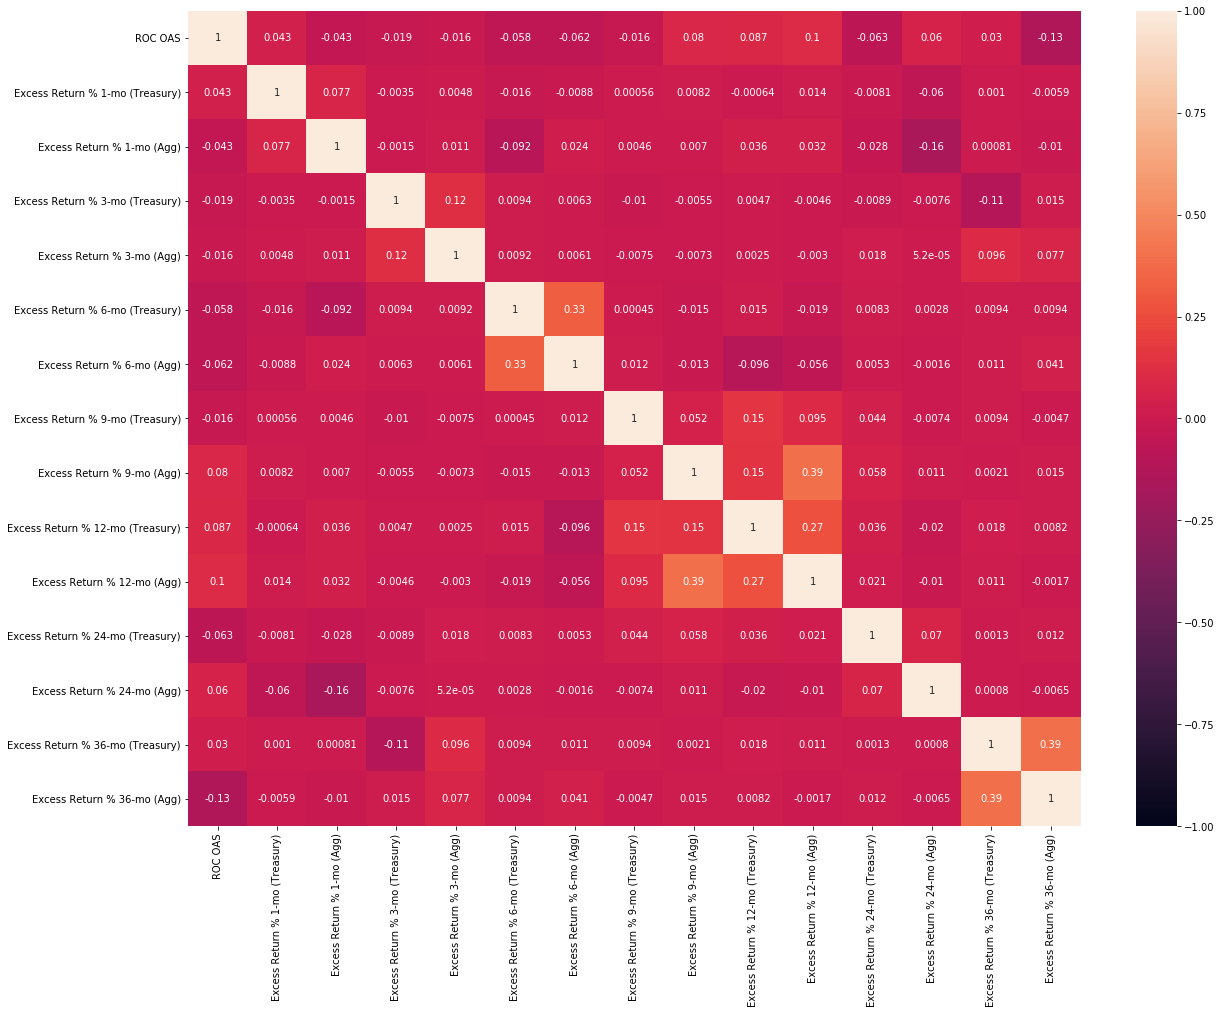

In [6]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(20, 15))
sns.heatmap(normalized_df[['ROC OAS', 'Excess Return % 1-mo (Treasury)', 'Excess Return % 1-mo (Agg)', 'Excess Return % 3-mo (Treasury)', 'Excess Return % 3-mo (Agg)', 'Excess Return % 6-mo (Treasury)', 'Excess Return % 6-mo (Agg)','Excess Return % 9-mo (Treasury)', 'Excess Return % 9-mo (Agg)', 'Excess Return % 12-mo (Treasury)', 'Excess Return % 12-mo (Agg)', 'Excess Return % 24-mo (Treasury)','Excess Return % 24-mo (Agg)','Excess Return % 36-mo (Treasury)','Excess Return % 36-mo (Agg)']].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

# Now that we see the picture, let us make some linear regression models.

## Relationship Between OAS & Excess Return % 1-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 1-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

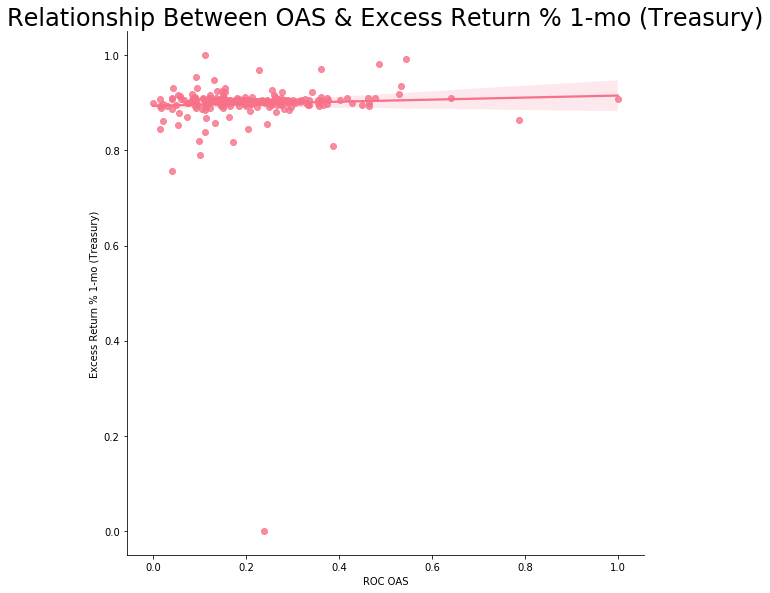

In [7]:
# For OAS Excess Return % 1-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 1-mo (Treasury)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 1-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 1-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

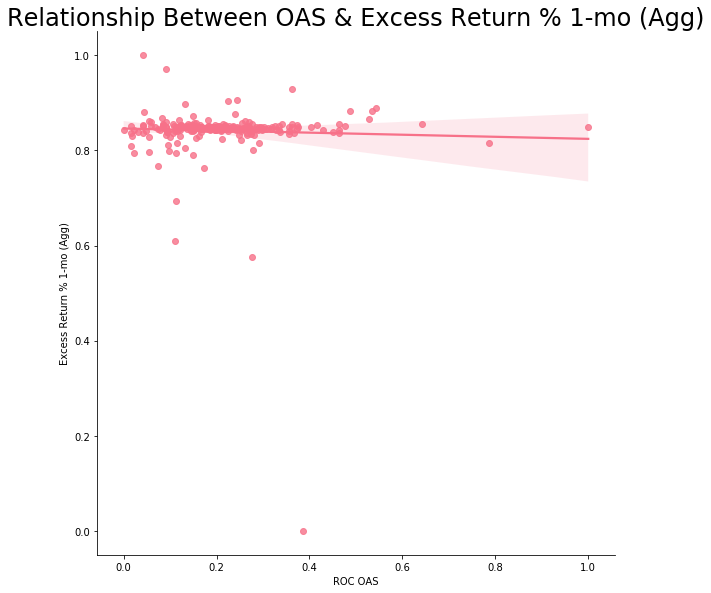

In [8]:
# For OAS Excess Return % 1-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 1-mo (Agg)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 3-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 3-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

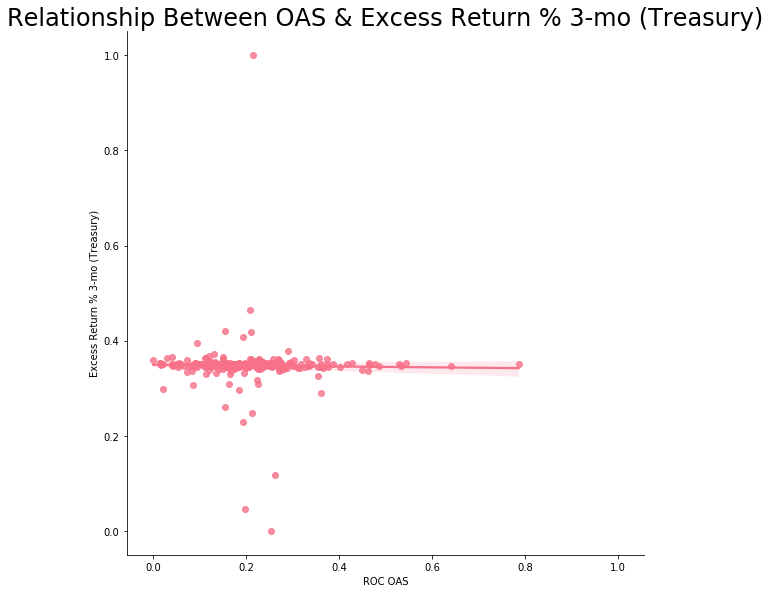

In [9]:
# For OAS Excess Return % 3-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 3-mo (Treasury)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 3-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 3-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

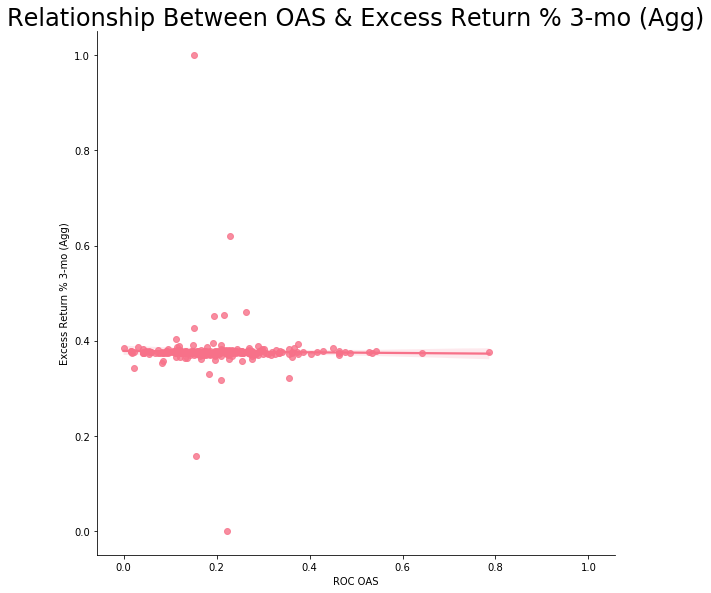

In [10]:
# For OAS Excess Return % 3-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 3-mo (Agg)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 6-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 6-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

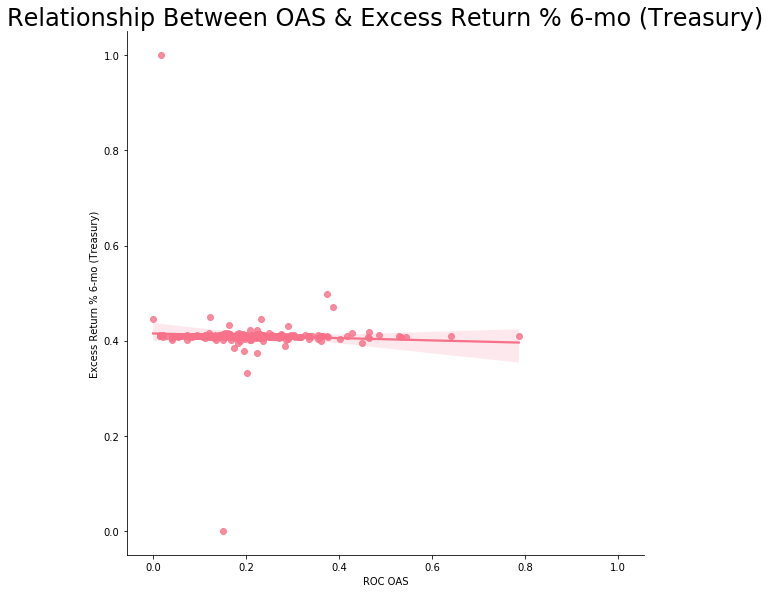

In [11]:
# For OAS Excess Return % 6-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 6-mo (Treasury)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 6-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 6-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

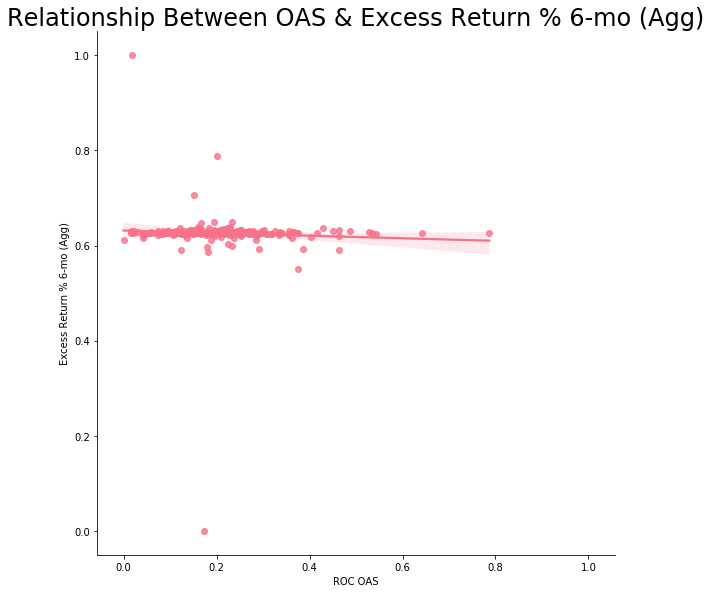

In [12]:
# For OAS Excess Return % 6-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 6-mo (Agg)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 9-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 9-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

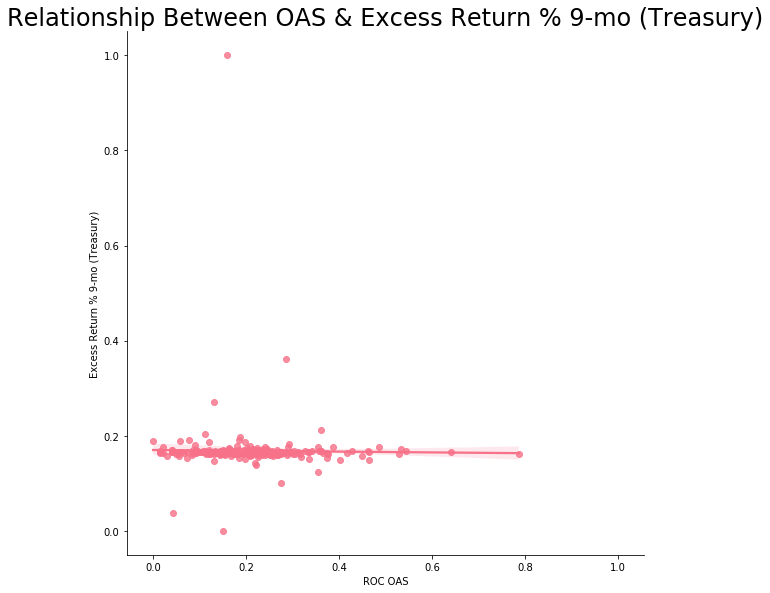

In [13]:
# For OAS Excess Return % 9-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 9-mo (Treasury)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 9-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 9-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

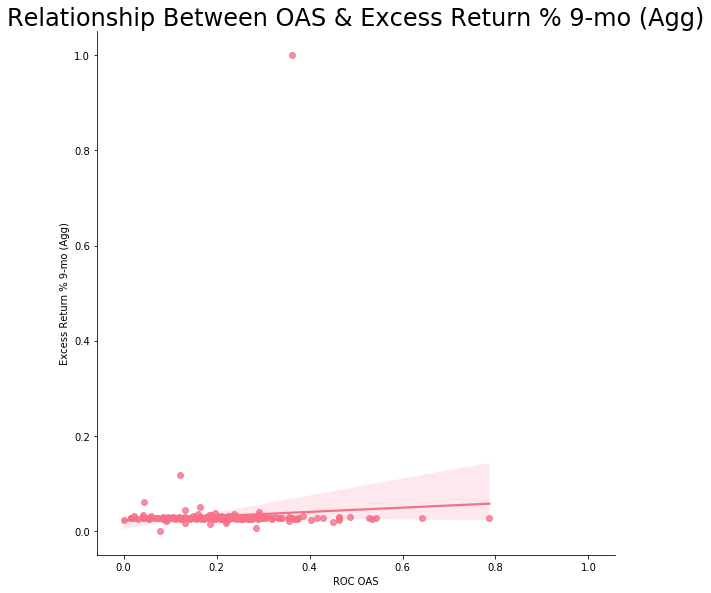

In [14]:
# For OAS Excess Return % 9-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 9-mo (Agg)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 12-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 12-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

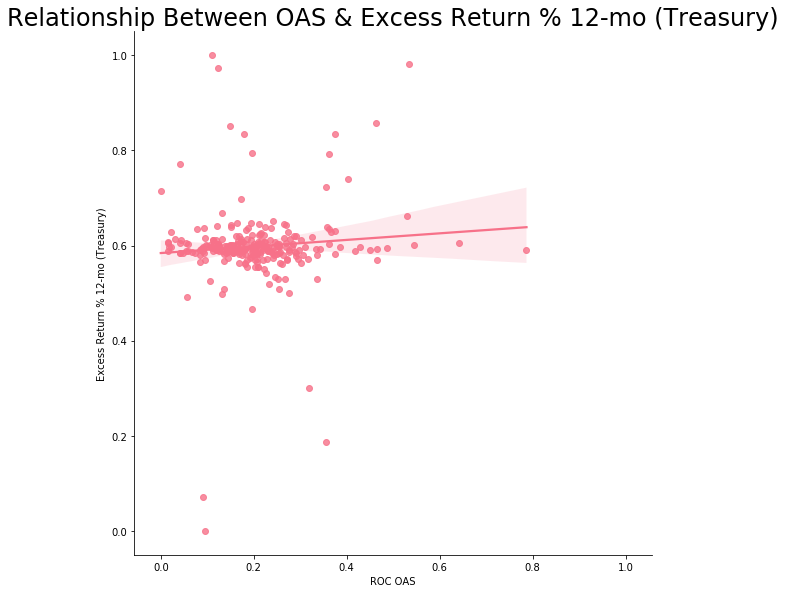

In [15]:
# For OAS Excess Return % 12-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 12-mo (Treasury)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Treasury)', size=24)


## Relationship Between OAS & Excess Return % 12-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 12-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

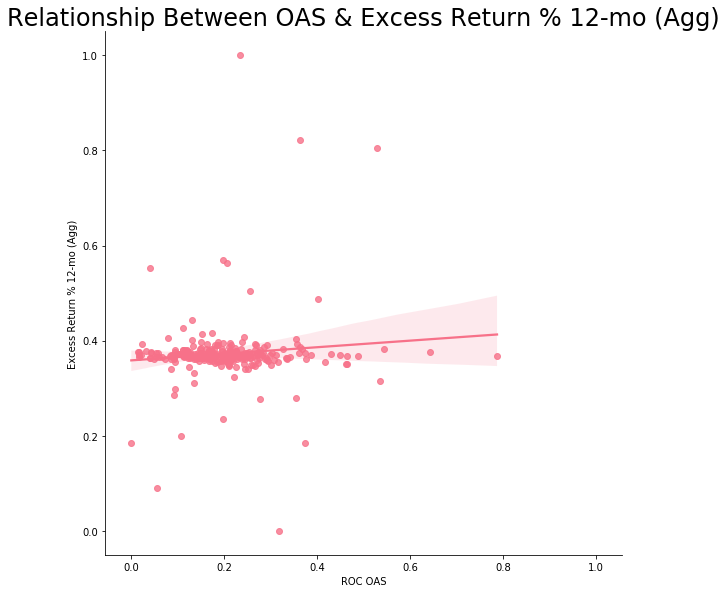

In [16]:
# For OAS Excess Return % 12-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 12-mo (Agg)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 24-mo (Treasury) shown below.


Text(0.5, 1, 'Relationship Between OAS & Excess Return % 24-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

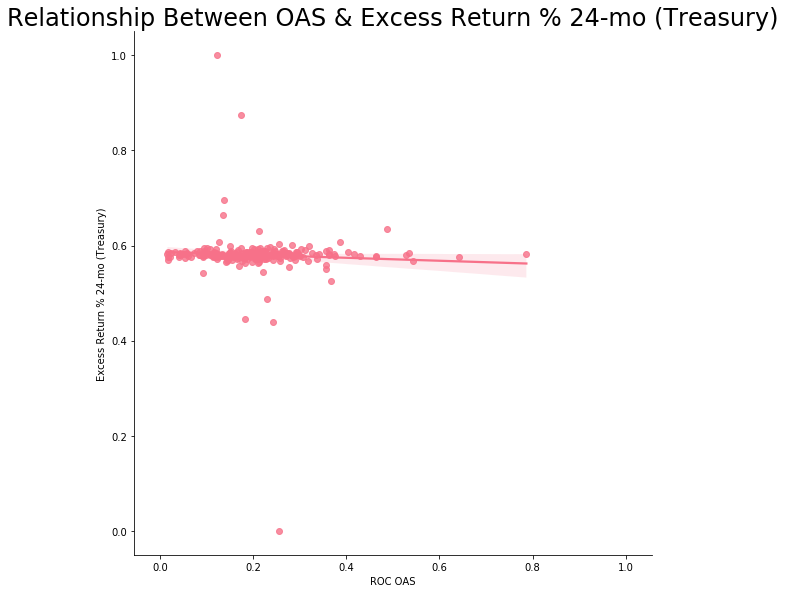

In [17]:
# For OAS Excess Return % 24-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 24-mo (Treasury)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Treasury)', size=24)


## Relationship Between OAS & Excess Return % 24-mo (Agg) shown below.


Text(0.5, 1, 'Relationship Between OAS & Excess Return % 24-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

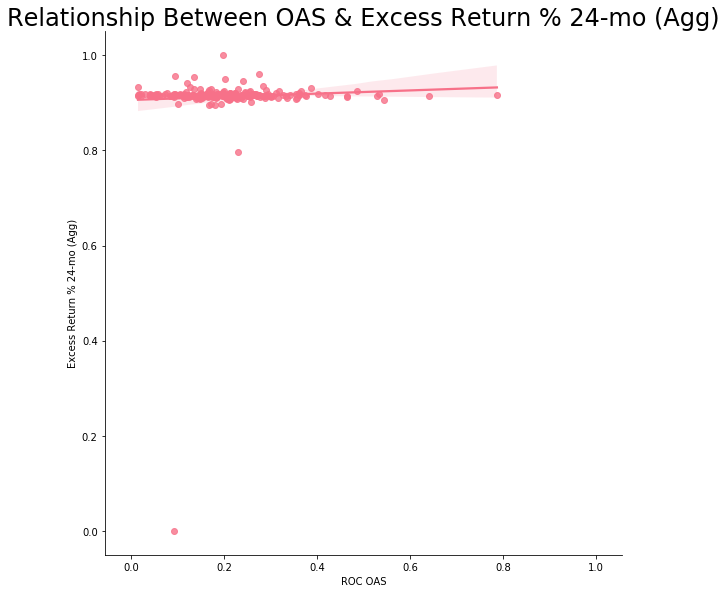

In [18]:
# For OAS Excess Return % 24-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 24-mo (Agg)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Agg)', size=24)

## Relationship Between OAS & Excess Return % 36-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 36-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

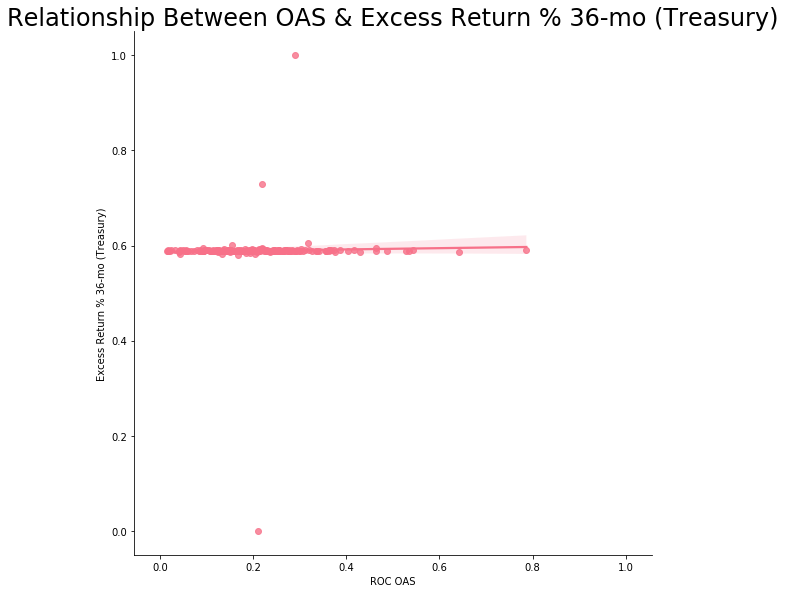

In [19]:
# For OAS Excess Return % 36-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 36-mo (Treasury)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Treasury)', size=24)

## Relationship Between OAS & Excess Return % 36-mo (Agg) shown below.


Text(0.5, 1, 'Relationship Between OAS & Excess Return % 36-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

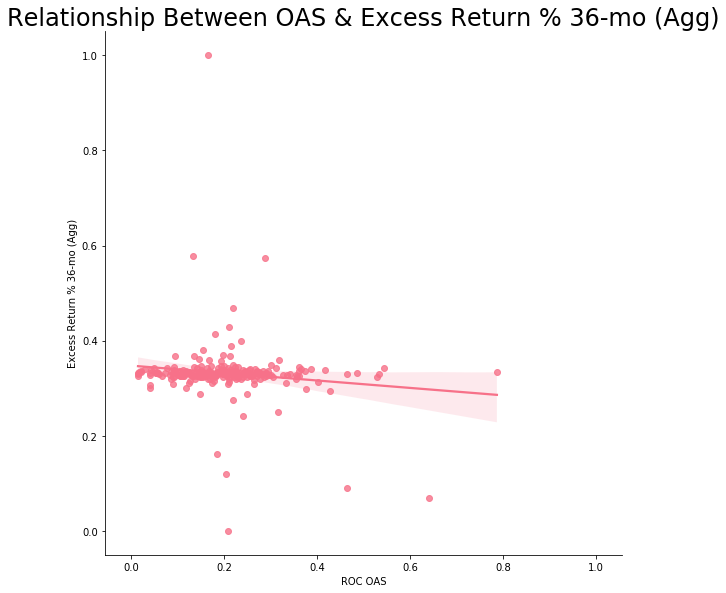

In [20]:
# For OAS Excess Return % 36-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('ROC OAS','Excess Return % 36-mo (Agg)', data = normalized_df, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Agg)', size=24)